## NLP

In [3]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs

##Загрузка и анализ данных

1. Удалить все нерелевантные символы (например, любые символы, не относящиеся к цифро-буквенным).
1. Токенизировать текст, разделив его на индивидуальные слова.
1. Удалить нерелевантные слова — например, упоминания в Twitter или URL-ы.
1. Перевести все символы в нижний регистр для того, чтобы слова «привет», «Привет» и «ПРИВЕТ» считались одним и тем же словом.
1. Рассмотрите возможность совмещения слов, написанных с ошибками, или имеющих альтернативное написание (например, «круто»/«круть»/ «круууто»)
1. Рассмотрите возможность проведения лемматизации, т. е. сведения различных форм одного слова к словарной форме (например, «машина» вместо «машиной», «на машине», «машинах» и пр.)

In [4]:
Tweets = pd.read_csv('Tweets.csv', encoding='utf-8')
Tweets

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 4 columns]

In [5]:
Tweets = Tweets.drop('textID', axis=1)
Tweets

text  \
0                    I`d have responded, if I were going   
1          Sooo SAD I will miss you here in San Diego!!!   
2                              my boss is bullying me...   
3                         what interview! leave me alone   
4       Sons of ****, why couldn`t they put them on t...   
...                                                  ...   
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 3 columns]

In [6]:
Tweets.describe()

text selected_text sentiment
count                                  27480         27480     27481
unique                                 27480         22463         3
top      I`d have responded, if I were going          good   neutral
freq                                       1           199     11118

In [7]:
Tweets.isnull().values.any()  #есть ли пропуски?

True

In [8]:
Tweets = Tweets.dropna()

In [9]:
Tweets['sentiment'] = Tweets['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive' : 2})
Tweets.tail()

<ipython-input-9-c15a9207c8b8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Tweets['sentiment'] = Tweets['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive' : 2})
<ipython-input-9-c15a9207c8b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tweets['sentiment'] = Tweets['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive' : 2})


text  \
27476   wish we could come see u on Denver  husband l...   
27477   I`ve wondered about rake to.  The client has ...   
27478   Yay good for both of you. Enjoy the break - y...   
27479                         But it was worth it  ****.   
27480     All this flirting going on - The ATG smiles...   

                                           selected_text  sentiment  
27476                                             d lost          0  
27477                                      , don`t force          0  
27478                          Yay good for both of you.          2  
27479                         But it was worth it  ****.          2  
27480  All this flirting going on - The ATG smiles. Y...          1

In [10]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

In [11]:
Tweets = standardize_text(Tweets, "text")
Tweets = standardize_text(Tweets, "selected_text")

Tweets.to_csv("clean_data.csv")
Tweets.head()

<ipython-input-10-111a649f3687>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.replace(r"http\S+", "")
<ipython-input-10-111a649f3687>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_field] = df[text_field].str.replace(r"http", "")
<ipython-input-10-111a649f3687>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

text  \
0                i`d have responded, if i were going   
1      sooo sad i will miss you here in san diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  
0  i`d have responded, if i were going          1  
1                             sooo sad          0  
2                          bullying me          0  
3                       leave me alone          0  
4                        sons of ****,          0

In [12]:
Tweets['sentiment'].value_counts()

sentiment
1    11117
2     8582
0     7781
Name: count, dtype: int64

в целом, сбалансировано, оставим так

In [13]:
clean_Tweets = pd.read_csv("clean_data.csv")
clean_Tweets.tail()

Unnamed: 0                                               text  \
27475       27476   wish we could come see u on denver  husband l...   
27476       27477   i`ve wondered about rake to.  the client has ...   
27477       27478   yay good for both of you. enjoy the break - y...   
27478       27479                         but it was worth it  ****.   
27479       27480     all this flirting going on - the atg smiles...   

                                           selected_text  sentiment  
27475                                             d lost          0  
27476                                      , don`t force          0  
27477                          yay good for both of you.          2  
27478                         but it was worth it  ****.          2  
27479  all this flirting going on - the atg smiles. y...          1

 i`d have responded, if i were going  sooo sad i will miss you here in san diego!!! my boss is bullying me...  what interview! leave me alone  sons of ****, why couldn`t they put them on the releases we already bought ://www.dothebouncy.com/smf - some shameless plugging for the best rangers forum on earth 2am feedings for the baby are fun when he is all smiles and coos soooo high  both of you  journey!? wow... u just became cooler.  hehe... (is that possible!?)  as much as i love to be hopeful, i reckon the chances are minimal =p i`m never gonna get my cake and stuff i really really like the song love story by taylor swift my sharpie is running dangerously low on ink i want to go to music tonight but i lost my voice. test test from the lg env2 uh oh, i am sunburned  s`ok, trying to plot alternatives as we speak *sigh* i`ve been sick for the past few days  and thus, my hair looks wierd.  if i didnt have a hat on it would look... ://tinyurl.com/mnf4kw is back home now      gonna miss eve

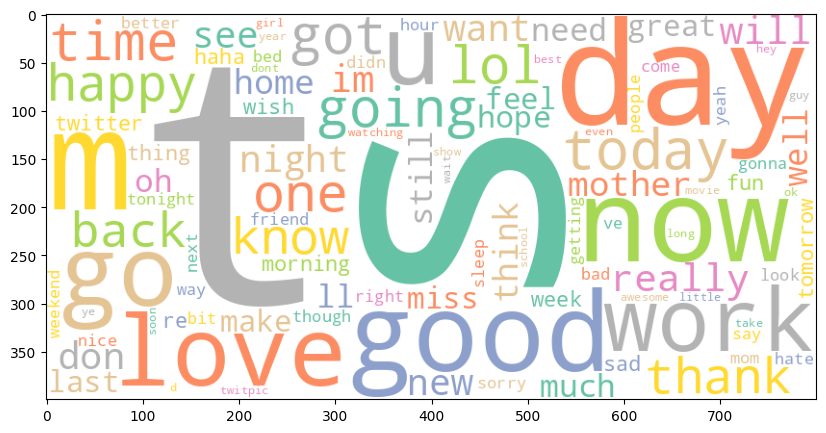

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

a = " ".join(clean_Tweets['text'].astype(str))
print(a)

en_cloud = WordCloud(max_words=100, background_color='white',
                     width=800, height=400,
                     collocations=False, colormap='Set2').generate(a)
fig = plt.figure(figsize=(10, 5))
plt.imshow(en_cloud);

##Подготовка данных

Преобразование данных так, чтобы модель могла их понять.
Из этого следует:
- Токенизация предложений в список отдельных слов
- Создание тестового сплита трейна
- Еще немного проверяем наши данные, чтобы подтвердить результаты.

In [15]:
#токенизация: разбили предложения на слова

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_Tweets['tokens'] = clean_Tweets['text'].apply(tokenizer.tokenize)
clean_Tweets.head()

Unnamed: 0                                               text  \
0           0                i`d have responded, if i were going   
1           1      sooo sad i will miss you here in san diego!!!   
2           2                          my boss is bullying me...   
3           3                     what interview! leave me alone   
4           4   sons of ****, why couldn`t they put them on t...   

                         selected_text  sentiment  \
0  i`d have responded, if i were going          1   
1                             sooo sad          0   
2                          bullying me          0   
3                       leave me alone          0   
4                        sons of ****,          0   

                                              tokens  
0        [i, d, have, responded, if, i, were, going]  
1  [sooo, sad, i, will, miss, you, here, in, san,...  
2                       [my, boss, is, bullying, me]  
3                [what, interview, leave, me, alone]  
4  [sons, of, why, couldn, t, they, put, them, on...

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from  keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_Tweets['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_Tweets['tokens']]
VOCAB = sorted(list(set(all_words)))
print("Всего слов: %s" % len(all_words))
print("Размер словаря: %s" % len(VOCAB))
print("Максимальная длина предложения: %s" % max(sentence_lengths))

Всего слов: 367556
Размер словаря: 26477
Максимальная длина предложения: 39


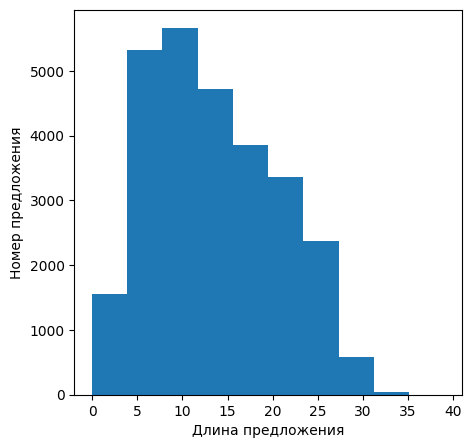

In [17]:
fig = plt.figure(figsize=(5, 5))
plt.xlabel('Длина предложения')
plt.ylabel('Номер предложения')
plt.hist(sentence_lengths)
plt.show()

##Собственно обучение


**Мешок слов** - мы можем построить словарь всех уникальных слов в нашем датасете, и ассоциировать уникальный индекс каждому слову в словаре. Каждое предложение тогда можно будет отобразить списком, длина которого равна числу уникальных слов в нашем словаре, а в каждом индексе в этом списке будет хранится, сколько раз данное слово встречается в предложении.
То есть мешок слов просто связывает индекс с каждым словом в нашем словаре и встраивает каждое предложение в виде списка нулей, с 1 в каждом индексе, соответствующем слову, присутствующему в предложении.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

In [19]:
list_corpus = clean_Tweets['text'].tolist()
list_labels = clean_Tweets['sentiment'].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=42)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [30]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['red', 'yellow','green']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            patch0 = mpatches.Patch(color=colors[0], label='negative')
            patch1 = mpatches.Patch(color=colors[1], label='neutral')
            patch2 = mpatches.Patch(color=colors[2], label='positive')
            plt.legend(handles=[patch0, patch1, patch2], prop={'size': 10})


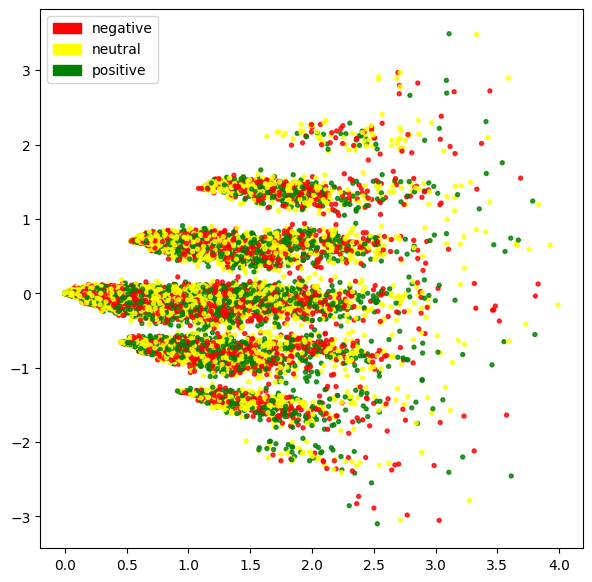

In [31]:
fig = plt.figure(figsize=(7, 7))
plot_LSA(X_train_counts, y_train)
plt.show()

всё плохо плохо плохо

##Классификация

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=42)
clf.fit(X_train_counts, y_train)

y_predicted_counts = clf.predict(X_test_counts)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, r2_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')

    r2 = r2_score(y_test, y_predicted)
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1, r2

смотрим метрики

In [26]:
accuracy, precision, recall, f1, r2 = get_metrics(y_test, y_predicted_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy, precision, recall, f1,r2))

accuracy = 0.641, precision = 0.641, recall = 0.641, f1 = 0.641, r2 = 0.190


##Инспектирование

In [27]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=13)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=11)
    plt.yticks(tick_marks, classes, fontsize=11)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] < thresh else "black", fontsize=15)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('Predicted label', fontsize=13)

    return plt

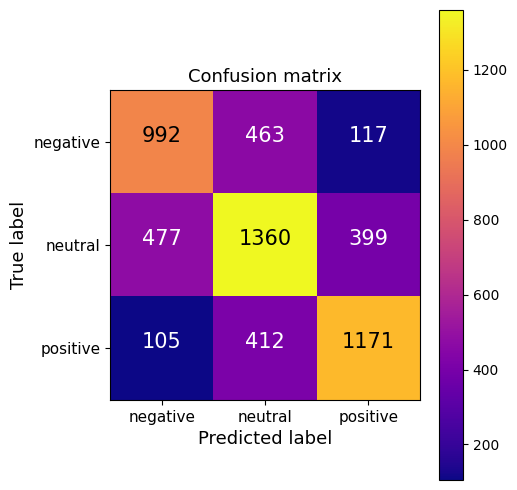

In [32]:
cm = confusion_matrix(y_test, y_predicted_counts)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm, classes=['negative','neutral','positive'], normalize=False, title='Confusion matrix', cmap="plasma")

In [33]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [34]:
importance = get_most_important_features(count_vectorizer, clf, 10)

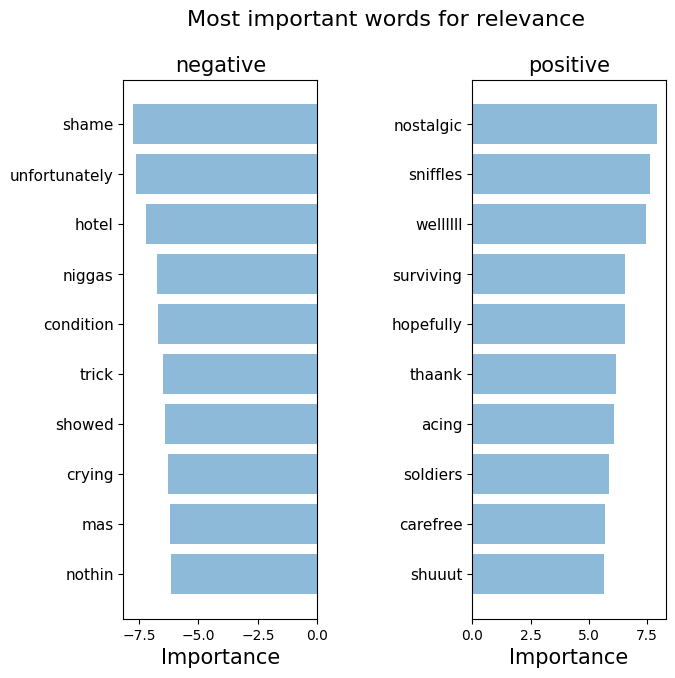

In [35]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(7, 7))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('negative', fontsize=15)
    plt.yticks(y_pos, bottom_words, fontsize=11)
    plt.suptitle('Key words', fontsize=13)
    plt.xlabel('Importance', fontsize=15)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('positive', fontsize=15)
    plt.yticks(y_pos, top_words, fontsize=11)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=15)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[2]['tops']]
top_words = [a[1] for a in importance[2]['tops']]
bottom_scores = [a[0] for a in importance[2]['bottom']]
bottom_words = [a[1] for a in importance[2]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

##Учитываем структуру словаря

TFIDF Bag of Words

Чтобы помочь нашей модели сфокусироваться на значимых словах, мы можем использовать скоринг TF-IDF (Term Frequency, Inverse Document Frequency) поверх нашей модели «мешка слов». TF-IDF взвешивает на основании того, насколько они редки в нашем датасете, понижая в приоритете слова, которые встречаются слишком часто и просто добавляют шум. Ниже приводится проекция метода главных компонент, позволяющая оценить наше новое представление.

In [36]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

In [37]:
X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

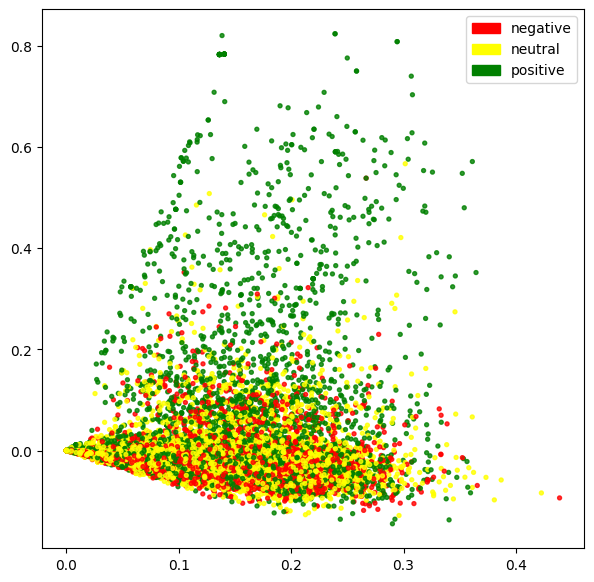

In [38]:
fig = plt.figure(figsize=(7, 7))
plot_LSA(X_train_tfidf, y_train)
plt.show()

In [39]:
clf_tfidf = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs=-1, random_state=42)
clf_tfidf.fit(X_train_tfidf, y_train)

y_predicted_tfidf = clf_tfidf.predict(X_test_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [40]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf = get_metrics(y_test, y_predicted_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f"  % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf, r2_tfidf))

accuracy = 0.653, precision = 0.653, recall = 0.653, f1 = 0.653, r2 = 0.221


TFIDF confusion matrix
[[1014  457  101]
 [ 486 1372  378]
 [ 109  377 1202]]
BoW confusion matrix
[[ 992  463  117]
 [ 477 1360  399]
 [ 105  412 1171]]


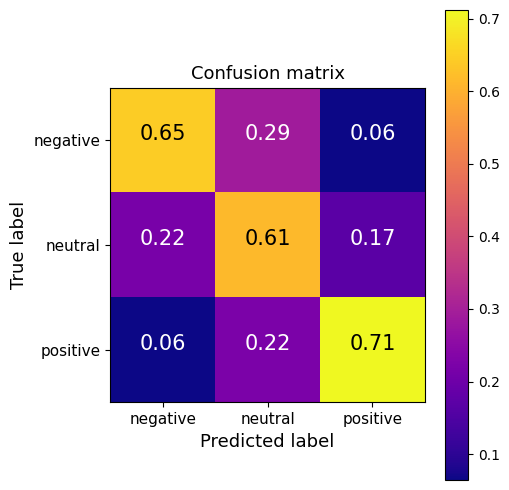

In [41]:
cm2 = confusion_matrix(y_test, y_predicted_tfidf)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm2, classes=['negative','neutral','positive'], normalize=True, title='Confusion matrix', cmap="plasma")

print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [42]:
#какие признаки важны
importance_tfidf = get_most_important_features(tfidf_vectorizer, clf_tfidf, 10)

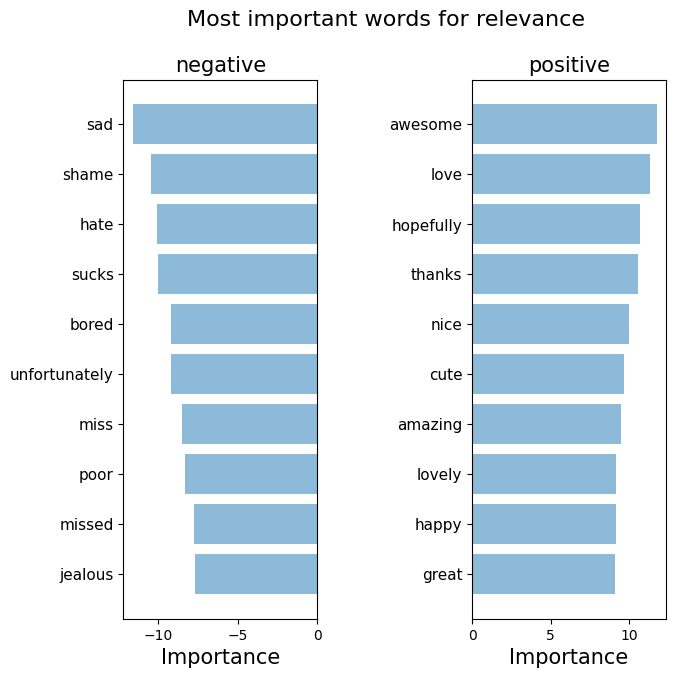

In [43]:
top_scores = [a[0] for a in importance_tfidf[2]['tops']]
top_words = [a[1] for a in importance_tfidf[2]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[2]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[2]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

##Применение семантики

Наша последняя модель смогла «выхватить» слова, несущие наибольшее значение. Однако, скорее всего, когда мы выпустим ее в продакшн, она столкнется со словами, которые не встречались в обучающей выборке — и не сможет точно классифицировать эти твиты, даже если она видела весьма похожие слова во время обучения.

Чтобы решить данную проблему, нам потребуется захватить семантическое (смысловое) значение слов — это означает, что для нас важно понимать, что слова «хороший» и «позитивный» ближе друг к другу, чем слова «абрикос» и «континент». Мы воспользуемся инструментом Word2Vec, который поможет нам сопоставить значения слов.

Использование результатов предварительного обучения

Word2Vec — это техника для поиска непрерывных отображений для слов. Word2Vec обучается на прочтении огромного количества текста с последующим запоминанием того, какое слово возникает в схожих контекстах. После обучения на достаточном количестве данных, Word2Vec генерирует вектор из 300 измерений для каждого слова в словаре, в котором слова со схожим значением располагаются ближе друг к другу.

Авторы публикации на тему непрерывных векторных представлений слов выложили в открытый доступ модель, которая была предварительно обучена на очень большом объеме информации, и мы можем использовать ее в нашей модели, чтобы внести знания о семантическом значении слов

In [44]:
!python -m gensim.downloader --download word2vec-google-news-300

2024-12-02 08:24:27,809 : __main__ : INFO : Creating /root/gensim-data
[==================================================] 100.0% 1662.8/1662.8MB downloaded
2024-12-02 08:26:03,349 : __main__ : INFO : word2vec-google-news-300 downloaded
2024-12-02 08:26:03,350 : __main__ : INFO : Data has been installed and data path is /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz


In [45]:
import gensim

# Load Google's pre-trained Word2Vec model.
word2vec_path = "~/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz"
word2vec = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

In [46]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['tokens'].apply(lambda x: get_average_word2vec(x, vectors,
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [47]:
embeddings = get_word2vec_embeddings(word2vec, clean_Tweets)
X_train_word2vec, X_test_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(embeddings, list_labels, test_size=0.2, random_state=42)

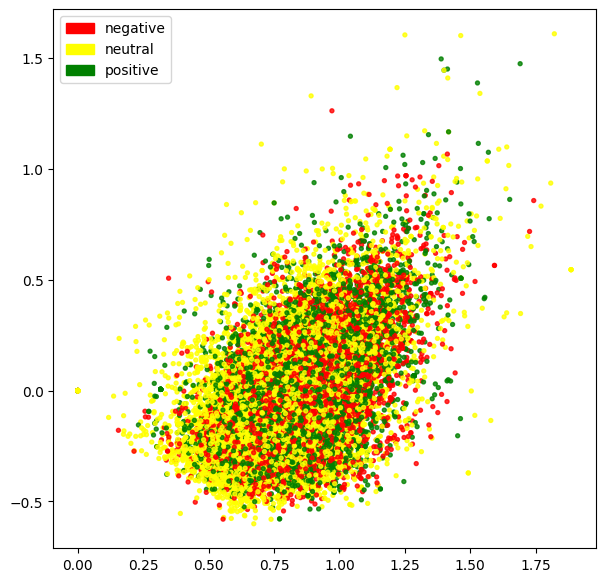

In [48]:
fig = plt.figure(figsize=(7, 7))
plot_LSA(embeddings, list_labels)
plt.show()

In [49]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', multi_class='multinomial', random_state=42)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [50]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec, r2_word2vec))

accuracy = 0.662, precision = 0.663, recall = 0.662, f1 = 0.662, r2 = 0.219


Word2Vec confusion matrix
[[1050  418  104]
 [ 497 1383  356]
 [ 125  357 1206]]
TFIDF confusion matrix
[[1014  457  101]
 [ 486 1372  378]
 [ 109  377 1202]]
BoW confusion matrix
[[ 992  463  117]
 [ 477 1360  399]
 [ 105  412 1171]]


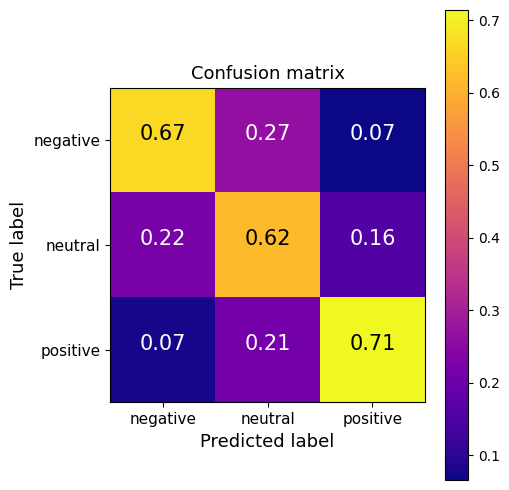

In [76]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(5, 5))
plot = plot_confusion_matrix(cm_w2v, classes=['negative','neutral','positive'], normalize=True, title='Confusion matrix', cmap="plasma")

print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

##LIME

In [52]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0d7372b0ad315af53f07cf4eb62cc70a43c95f36bed066dca5d24ad99cf82155
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [53]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=42)
vector_store = word2vec
def word2vec_pipeline(examples):
    global vector_store
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_list = []

    for example in examples:
      # Проверяем на корректность
      # if example is None or not example.strip():
      #     print(f"Warning: Invalid input found: '{example}'")

      example_tokens = tokenizer.tokenize(example)

      vectorized_example = get_average_word2vec(example_tokens, vector_store, generate_missing=False, k=300)

      if vectorized_example is None:
          print(f"Warning: get_average_word2vec returned None for tokens: {example_tokens}")

      tokenized_list.append(vectorized_example)
    return clf_w2v.predict_proba(tokenized_list)

c = make_pipeline(count_vectorizer, clf)

In [57]:
def explain_one_instance(instance, class_names):
    explainer = LimeTextExplainer(class_names=class_names)
    exp = explainer.explain_instance(instance, word2vec_pipeline, num_features=6)
    return exp

def visualize_one_exp(features, labels, index, class_names = ['negative','positive','neutral']):
    exp = explain_one_instance(features[index], class_names = class_names)
    print('Index: %d' % index)
    print('True class: %s' % class_names[labels[index]])
    exp.show_in_notebook(text=True)

In [58]:
visualize_one_exp(X_test_data, y_test_data, 65)

Index: 65
True class: negative


In [62]:
visualize_one_exp(X_test_data, y_test_data, 70)

Index: 70
True class: positive


In [63]:
X_test_data = [line.strip() for line in X_test_data if line.strip()]  #удаление пробелов в начале и конце строки + удаление пустых строк

In [64]:
import random
from collections import defaultdict

random.seed(40)


label_to_text = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}

sample_sentences = random.sample(X_test_data, 100)
del sample_sentences[1]
explainer = LimeTextExplainer()

labels_to_sentences = defaultdict(list)
contributors = defaultdict(dict)

    # First, find contributing words to each class
for sentence in sample_sentences:

    if not sentence.strip():  # Проверка на пустую строку
       print(f"Warning: Skipping empty or whitespace-only sentence: '{sentence}'")

    probabilities = word2vec_pipeline([sentence])
    #print(sentence)

    if probabilities is None:
      print(f"Warning: Word2vec pipeline returned None for sentence: '{sentence}'")

    curr_label = probabilities[0].argmax()
    #print(curr_label)

    labels_to_sentences[curr_label].append(sentence)
    #print(labels_to_sentences[curr_label])

        # Добавляем проверку на количество слов в предложении
    doc_size = len(sentence.split())
    if doc_size < 1:
      print(f"Warning: Skipping explanation for sentence with no words: '{sentence}'")

    exp = explainer.explain_instance(sentence, word2vec_pipeline, num_features=6, labels=[curr_label])
    listed_explanation = exp.as_list(label=curr_label)

    for word,contributing_weight in listed_explanation:
        if word in contributors[curr_label]:
            contributors[curr_label][word].append(contributing_weight)
        else:
            contributors[curr_label][word] = [contributing_weight]

average_contributions = {}
sorted_contributions = {}
for label,lexica in contributors.items():
    curr_label = label
    curr_lexica = lexica
    average_contributions[curr_label] = pd.Series(index=curr_lexica.keys())
    for word,scores in curr_lexica.items():
        average_contributions[curr_label].loc[word] = np.sum(np.array(scores))/100
    detractors = average_contributions[curr_label].sort_values()
    supporters = average_contributions[curr_label].sort_values(ascending=False)
    sorted_contributions[label_to_text[curr_label]] = {
        'detractors':detractors,
        'supporters': supporters
    }


print(sorted_contributions)

{'positive': {'detractors': almost    -0.003163
forgot    -0.003148
miss      -0.003029
car       -0.002913
chavs     -0.002713
             ...   
sweet      0.007138
loved      0.007261
perfect    0.007432
excited    0.007561
good       0.013253
Length: 125, dtype: float64, 'supporters': good       0.013253
excited    0.007561
perfect    0.007432
loved      0.007261
sweet      0.007138
             ...   
chavs     -0.002713
car       -0.002913
miss      -0.003029
forgot    -0.003148
almost    -0.003163
Length: 125, dtype: float64}, 'negative': {'detractors': you             -0.005631
good            -0.003303
see             -0.003250
fantastically   -0.002325
awesome         -0.002259
                   ...   
miserable        0.006491
t                0.006507
lazy             0.006615
bad              0.008027
poor             0.008812
Length: 149, dtype: float64, 'supporters': poor             0.008812
bad              0.008027
lazy             0.006615
t                0.006507

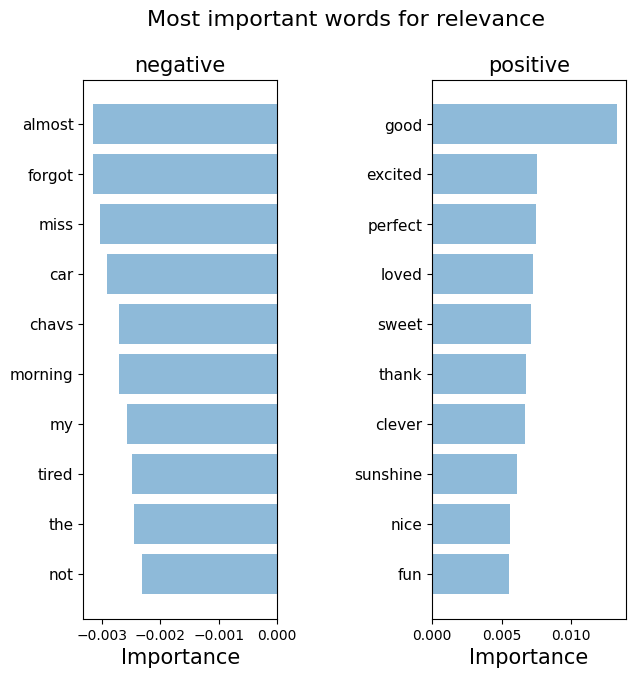

In [65]:
# First index is the class (Disaster)
# Second index is 0 for detractors, 1 for supporters
# Third is how many words we sample
top_words = sorted_contributions['positive']['supporters'][:10].index.tolist()
top_scores = sorted_contributions['positive']['supporters'][:10].tolist()
bottom_words = sorted_contributions['positive']['detractors'][:10].index.tolist()
bottom_scores = sorted_contributions['positive']['detractors'][:10].tolist()

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

##Использование синтаксиса для end-to-end подоходов

In [77]:
from tensorflow.keras.preprocessing.text  import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_Tweets['text'].tolist())
sequences = tokenizer.texts_to_sequences(clean_Tweets['text'].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_Tweets['sentiment']))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
#print(embedding_weights.shape)

Found 26597 unique tokens.


In [78]:
#простейшая CNN

from keras.layers import Dense, Input, Flatten, Dropout, Concatenate
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import LSTM, Bidirectional
from keras.models import Model

def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index, trainable=False, extra_conv=True):

    embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=trainable)

    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    # Yoon Kim model (https://arxiv.org/abs/1408.5882)
    convs = []
    filter_sizes = [3,4,5]

    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=128, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = MaxPooling1D(pool_size=3)(l_conv)
        convs.append(l_pool)

    l_merge = Concatenate(axis=1)(convs)

    # add a 1D convnet with global maxpooling, instead of Yoon Kim model
    conv = Conv1D(filters=128, kernel_size=3, activation='relu')(embedded_sequences)
    pool = MaxPooling1D(pool_size=3)(conv)

    if extra_conv==True:
        x = Dropout(0.5)(l_merge)
    else:
        # Original Yoon Kim model
        x = Dropout(0.5)(pool)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    #x = Dropout(0.5)(x)

    preds = Dense(labels_index, activation='softmax')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

    return model

In [79]:
x_train = cnn_data[:-num_validation_samples]
y_train = labels[:-num_validation_samples]
x_val = cnn_data[-num_validation_samples:]
y_val = labels[-num_validation_samples:]

model = ConvNet(embedding_weights, MAX_SEQUENCE_LENGTH, len(word_index)+1, EMBEDDING_DIM,
                len(list(clean_Tweets['sentiment'].unique())), False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [80]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)

Epoch 1/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 43s 237ms/step - acc: 0.4349 - loss: 1.0554 - val_acc: 0.6721 - val_loss: 0.7577
Epoch 2/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 39s 225ms/step - acc: 0.6732 - loss: 0.7377 - val_acc: 0.7041 - val_loss: 0.6875
Epoch 3/3
172/172 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - acc: 0.7222 - loss: 0.6569 - val_acc: 0.7158 - val_loss: 0.6681


In [81]:
y_pred = model.predict(x_val)

172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


In [82]:
y_pred_cnn = np.argmax(y_pred, axis=1)
y_val_cnn = np.argmax(y_val, axis=1)

In [83]:
y_val_cnn

array([2, 1, 1, ..., 1, 2, 2])

In [84]:
accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn = get_metrics(y_val_cnn, y_pred_cnn)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f, r2 = %.3f" % (accuracy_cnn, precision_cnn, recall_cnn, f1_cnn, r2_cnn))

accuracy = 0.716, precision = 0.718, recall = 0.716, f1 = 0.716, r2 = 0.380


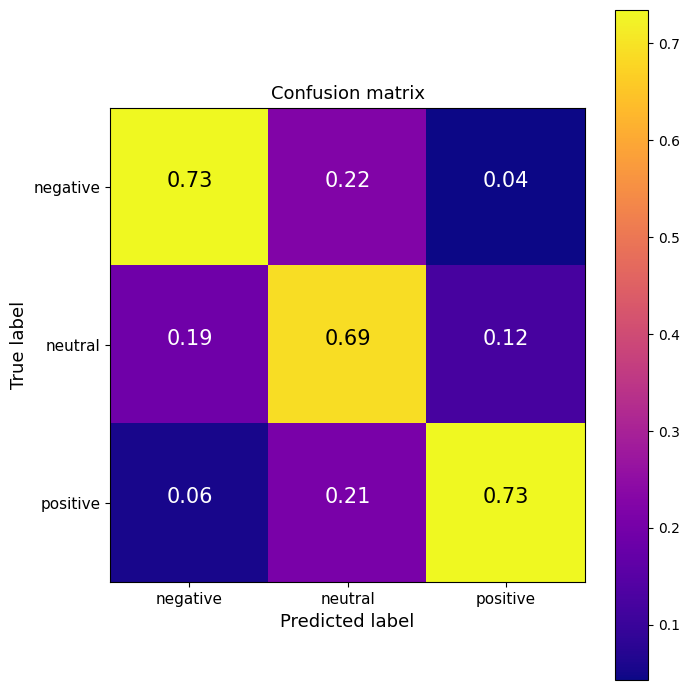

CNN confusion matrix
[[1170  357   69]
 [ 413 1499  265]
 [  96  362 1265]]
Word2Vec confusion matrix
[[1050  418  104]
 [ 497 1383  356]
 [ 125  357 1206]]
TFIDF confusion matrix
[[1014  457  101]
 [ 486 1372  378]
 [ 109  377 1202]]
BoW confusion matrix
[[ 992  463  117]
 [ 477 1360  399]
 [ 105  412 1171]]


In [85]:
cm_cnn = confusion_matrix(y_val_cnn, y_pred_cnn)
fig = plt.figure(figsize=(7, 7))
plot = plot_confusion_matrix(cm_cnn, classes=['negative', 'neutral', 'positive'], normalize=True, title='Confusion matrix', cmap='plasma')
plt.show()

print("CNN confusion matrix")
print(cm_cnn)
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)